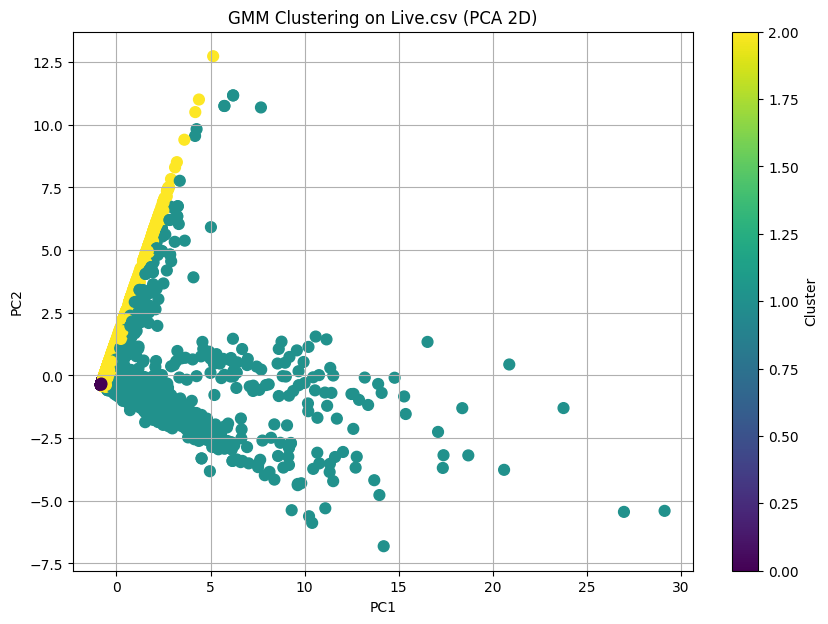

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('./Live.csv')

# 2. Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
# 2-1. Í≤∞Ï∏°Ïπò ÎπÑÏú® 50% Ïù¥ÏÉÅÏù∏ Ïª¨Îüº Ï†úÍ±∞
df = df.loc[:, df.isnull().mean() < 0.5]

# 2-2. Ïà´ÏûêÌòï Ïª¨ÎüºÎßå ÏÑ†ÌÉù ÌõÑ, Í≤∞Ï∏°ÏπòÎäî ÌèâÍ∑†ÏúºÎ°ú ÎåÄÏ≤¥
df_num = df.select_dtypes(include=['float64', 'int64'])
df_num = df_num.fillna(df_num.mean(numeric_only=True))

# 2-3. Î∂àÌïÑÏöîÌïú ID Ïª¨ÎüºÏù¥ ÏûàÎã§Î©¥ Ï†úÍ±∞
if 'status_id' in df_num.columns:
    df_num = df_num.drop(columns=['status_id'])

# 3. Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)

# 4. PCAÎ°ú 2Ï∞®Ïõê Ï∂ïÏÜå
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 5. GMM Íµ∞ÏßëÌôî
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_pca)
cluster_labels = gmm.predict(X_pca)

# 6. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=60)
plt.title('GMM Clustering on Live.csv (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()


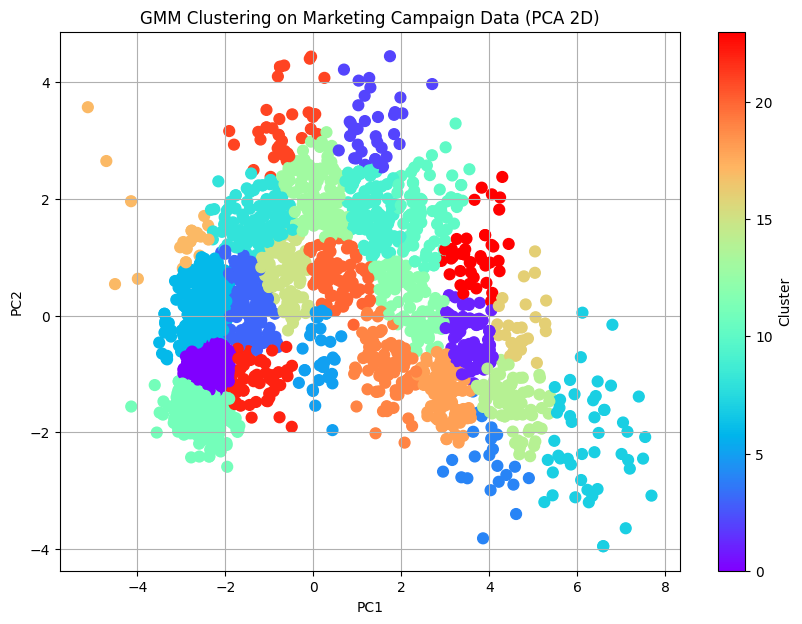

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('./marketing_campaign.csv', sep='\t')

# 2. Ï†ÑÏ≤òÎ¶¨
# 2-1. Í≤∞Ï∏°Ïπò Ï†úÍ±∞
df = df.dropna()

# 2-2. ÎÇ†ÏßúÌòï Î≥ÄÌôò (dayfirst=TrueÎ°ú ÏßÄÏ†ï)
if 'Dt_Customer' in df.columns:
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

# 2-3. Ïà´ÏûêÌòï Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂ú
df_num = df.select_dtypes(include=['float64', 'int64'])

# 2-4. ID Ïª¨Îüº Ï†úÍ±∞ (ÏûàÎã§Î©¥)
if 'ID' in df_num.columns:
    df_num = df_num.drop(columns=['ID'])

# 3. Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)

# 4. PCAÎ°ú 2Ï∞®Ïõê Ï∂ïÏÜå
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 5. GMM Íµ∞ÏßëÌôî
gmm = GaussianMixture(n_components=24, random_state=42)
gmm.fit(X_pca)
cluster_labels = gmm.predict(X_pca)

# 6. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='rainbow', s=60)
plt.title('GMM Clustering on Marketing Campaign Data (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()


üìå MAE: 7954.66
üìå RMSE: 14646.28


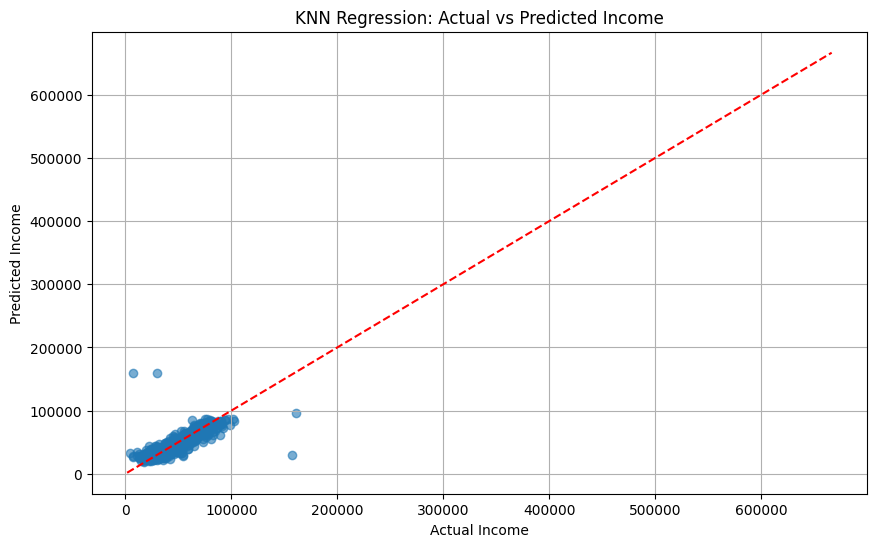

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('./marketing_campaign.csv', sep='\t')

# 2. Ï†ÑÏ≤òÎ¶¨
df = df.dropna(subset=['Income'])  # Income Í≤∞Ï∏°Ïπò Ï†úÍ±∞

# ÎÇ†Ïßú Ï≤òÎ¶¨ (ÏÑ†ÌÉù)
if 'Dt_Customer' in df.columns:
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

# Ïà´ÏûêÌòï Î≥ÄÏàòÎßå ÏÑ†ÌÉù
df_num = df.select_dtypes(include=['float64', 'int64'])

# ID Ï†úÍ±∞
if 'ID' in df_num.columns:
    df_num = df_num.drop(columns=['ID'])

# 3. ÌäπÏßï(X), ÌÉÄÍ≤ü(y) Î∂ÑÎ¶¨
X = df_num.drop(columns=['Income'])
y = df_num['Income']

# 4. ÌïôÏäµ/Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. KNN ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 7. ÏòàÏ∏°
y_pred = knn.predict(X_test_scaled)

# 8. ÏÑ±Îä• ÌèâÍ∞Ä
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"üìå MAE: {mae:.2f}")
print(f"üìå RMSE: {rmse:.2f}")

# 9. ÏòàÏ∏° vs Ïã§Ï†ú ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.title('KNN Regression: Actual vs Predicted Income')
plt.grid(True)
plt.show()


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("marketing_campaign.csv", sep="\t")

# 2. ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ±
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df['Age'] = 2025 - df['Year_Birth']
df['SpendingTotal'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# 3. ÌïÑÏöîÌïú Ïó¥Îßå ÏÇ¨Ïö©ÌïòÍ≥† Í≤∞Ï∏°Ïπò Ï†úÍ±∞
df_model = df[['Age', 'SpendingTotal', 'Income']].dropna()

# 4. ÏûÖÎ†• X / ÌÉÄÍ≤ü y
X = df_model[['Age', 'SpendingTotal']]
y = df_model['Income']

# 5. Ï†ïÍ∑úÌôî
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 7. Î™®Îç∏ ÌïôÏäµ
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# 8. ÏÇ¨Ïö©Ïûê ÏûÖÎ†• Î∞õÍ∏∞
age = float(input("ÎÇòÏù¥Î•º ÏûÖÎ†•ÌïòÏÑ∏Ïöî (Ïòà: 45): "))
spending = float(input("Ï¥ù ÏßÄÏ∂úÏï°ÏùÑ ÏûÖÎ†•ÌïòÏÑ∏Ïöî (Ïòà: 1000): "))

# 9. ÏòàÏ∏°
user_input = np.array([[age, spending]])
user_scaled = scaler.transform(user_input)
predicted_income = knn.predict(user_scaled)

print(f"\n[ÏòàÏ∏° Í≤∞Í≥º]")
print(f"ÏòàÏÉÅ ÏÜåÎìù: {predicted_income[0]:,.0f} Îã¨Îü¨")



[ÏòàÏ∏° Í≤∞Í≥º]
ÏòàÏÉÅ ÏÜåÎìù: 84,871 Îã¨Îü¨


c:\Users\ljm16\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("marketing_campaign.csv", sep="\t")

# 2. ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ±
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df['SpendingTotal'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['ChildCount'] = df['Kidhome'] + df['Teenhome']

# 3. ÌïÑÏöîÌïú Ïó¥Îßå ÏÑ†ÌÉù ÌõÑ Í≤∞Ï∏°Ïπò Ï†úÍ±∞
df_model = df[['SpendingTotal', 'ChildCount']].dropna()

# 4. ÎèÖÎ¶ΩÎ≥ÄÏàò/Ï¢ÖÏÜçÎ≥ÄÏàò ÏÑ§Ï†ï
X = df_model[['SpendingTotal']]
y = df_model['ChildCount']

# 5. Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 7. KNN ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# 8. ÏòàÏ∏°
y_pred = knn.predict(X_test)

# 9. ÌèâÍ∞Ä
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"üìå MAE: {mae:.2f}")
print(f"üìå RMSE: {rmse:.2f}")

# 11. ÏÇ¨Ïö©Ïûê ÏûÖÎ†•ÏúºÎ°ú ÏûêÎÖÄ Ïàò ÏòàÏ∏°
try:
    spending_input = float(input("Ï¥ù ÏÜåÎπÑ Í∏àÏï°ÏùÑ ÏûÖÎ†•ÌïòÏÑ∏Ïöî (Ïòà: 1000): "))
    spending_scaled = scaler.transform([[spending_input]])  # ÏûÖÎ†•Í∞í Ï†ïÍ∑úÌôî
    child_pred = knn.predict(spending_scaled)

    print("\n[ÏòàÏ∏° Í≤∞Í≥º]")
    print(f"ÏòàÏÉÅ ÏûêÎÖÄ Ïàò: {child_pred[0]:.2f}Î™Ö")

except Exception as e:
    print("‚ö†Ô∏è Ïò¨Î∞îÎ•∏ Ïà´ÏûêÎ•º ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî.")
    print("ÏóêÎü¨:", e)

üìå MAE: 0.56
üìå RMSE: 0.75

[ÏòàÏ∏° Í≤∞Í≥º]
ÏòàÏÉÅ ÏûêÎÖÄ Ïàò: 0.00Î™Ö


c:\Users\ljm16\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


 Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä:
- MAE: 227.63
- RMSE: 335.57
- R¬≤: 0.72


C:\Users\ljm16\AppData\Local\Temp\ipykernel_35240\3018567782.py:66: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  plt.tight_layout()
C:\Users\ljm16\AppData\Local\Temp\ipykernel_35240\3018567782.py:66: UserWarning: Glyph 50977 (\N{HANGUL SYLLABLE YUG}) missing from current font.
  plt.tight_layout()
C:\Users\ljm16\AppData\Local\Temp\ipykernel_35240\3018567782.py:66: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
C:\Users\ljm16\AppData\Local\Temp\ipykernel_35240\3018567782.py:66: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  plt.tight_layout()
C:\Users\ljm16\AppData\Local\Temp\ipykernel_35240\3018567782.py:66: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()
C:\Users\ljm16\AppData\Local\Temp\ipykernel_35240\3018567782.py:66: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  plt.tight_layout(

c:\Users\ljm16\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ljm16\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50977 (\N{HANGUL SYLLABLE YUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ljm16\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ljm16\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ljm16\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:1

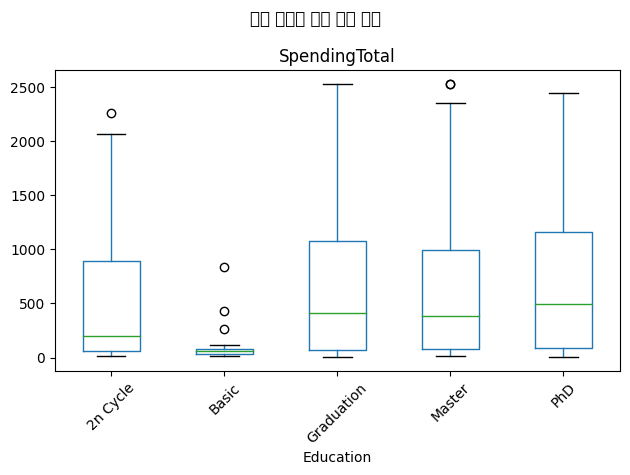


ÏòàÏÉÅ Ï¥ù ÏÜåÎπÑ Í∏àÏï°: $112.14


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Î∞è Ï†ÑÏ≤òÎ¶¨
df = pd.read_csv("marketing_campaign.csv", sep="\t")

# ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ±
df['SpendingTotal'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                         'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

# 2. Í∞ÄÏÑ§ ÏÑ§Ï†ï: "ÏÜåÎìùÍ≥º ÍµêÏú° ÏàòÏ§ÄÏù¥ Ï¥ù ÏÜåÎπÑ Í∏àÏï°ÏùÑ Í≤∞Ï†ïÌïúÎã§"
df_model = df[['Income', 'Education', 'SpendingTotal']].dropna()

# 3. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X = df_model[['Income', 'Education']]  # ÎèÖÎ¶ΩÎ≥ÄÏàò: ÏÜåÎìù + ÍµêÏú° ÏàòÏ§Ä
y = df_model['SpendingTotal']          # Ï¢ÖÏÜçÎ≥ÄÏàò: Ï¥ù ÏÜåÎπÑ Í∏àÏï°

# 4. Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏ (Î≤îÏ£ºÌòï Î≥ÄÏàò Ï≤òÎ¶¨)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Income']),  # ÏàòÏπòÌòï: Ïä§ÏºÄÏùºÎßÅ
        ('cat', OneHotEncoder(), ['Education']) # Î≤îÏ£ºÌòï: ÏõêÌï´Ïù∏ÏΩîÎî©
    ])

X_processed = preprocessor.fit_transform(X)

# 5. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

# 6. Î™®Îç∏ ÌïôÏäµ
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)

# 7. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = knn.predict(X_test)

print(" Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä:")
print(f"- MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"- RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"- R¬≤: {r2_score(y_test, y_pred):.2f}")

# 8. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 5))

# ÏÜåÎìù-ÏÜåÎπÑ Í¥ÄÍ≥Ñ
plt.subplot(1, 2, 1)
plt.scatter(df_model['Income'], df_model['SpendingTotal'], alpha=0.5)
plt.xlabel('Annual Income (USD)')
plt.ylabel('Total Spending')
plt.title('ÏÜåÎìù ÎåÄÎπÑ ÏÜåÎπÑ Ìå®ÌÑ¥')

# ÍµêÏú° ÏàòÏ§ÄÎ≥Ñ ÏÜåÎπÑ Î∂ÑÌè¨
plt.subplot(1, 2, 2)
df_model.boxplot(column='SpendingTotal', by='Education', grid=False)
plt.xticks(rotation=45)
plt.suptitle('ÍµêÏú° ÏàòÏ§ÄÎ≥Ñ ÏÜåÎπÑ Í∏àÏï° Î∂ÑÌè¨')
plt.tight_layout()
plt.show()

# 9. ÏÇ¨Ïö©Ïûê ÏòàÏ∏° Ïù∏ÌÑ∞ÌéòÏù¥Ïä§
try:
    income = float(input("Ïó∞Í∞Ñ ÏÜåÎìùÏùÑ ÏûÖÎ†•ÌïòÏÑ∏Ïöî (USD): "))
    education = input("ÍµêÏú° ÏàòÏ§ÄÏùÑ ÏûÖÎ†•ÌïòÏÑ∏Ïöî (Graduation/PhD/Master/Basic/2n Cycle): ")
    
    user_data = pd.DataFrame([[income, education]], 
                            columns=['Income', 'Education'])
    processed_data = preprocessor.transform(user_data)
    
    prediction = knn.predict(processed_data)
    print(f"\nÏòàÏÉÅ Ï¥ù ÏÜåÎπÑ Í∏àÏï°: ${prediction[0]:.2f}")
    
except Exception as e:
    print(f"‚ö†Ô∏è Ïò§Î•ò Î∞úÏÉù: {str(e)}")